# Przetwarzanie sygnałów i obrazów: Sprawozdanie 005

### Temat: Systemy liniowe.
### Imię i nazwisko studenta: Paweł Niewiarowski, Szymon Łupiński
### Data realizacji ćwiczenia: 30.10.2022

In [1]:
import IPython.display as ipd
import numpy as np

from matplotlib import pyplot
from scipy import signal
from scipy.io import wavfile

In [2]:
class Plot:
    def __init__(self, x_values, y_values, title,
                 x_label, y_label, ax, y_lim=None, x_lim=None, label=None):
        self.x_values = x_values
        self.y_values = y_values
        self.title = title
        self.x_label = x_label
        self.y_label = y_label
        self.ax = ax
        self.y_lim = y_lim
        self.x_lim = x_lim
        self.label = label

    def draw(self):
        if self.label:
            self.ax.plot(self.x_values, self.y_values, label=self.label)
        else:
            self.ax.plot(self.x_values, self.y_values)
        self.ax.set_title(self.title)
        self.ax.set_xlabel(self.x_label)
        self.ax.set_ylabel(self.y_label)
        self.ax.grid()
        if self.y_lim:
            self.ax.set_ylim(self.y_lim[0], self.y_lim[1])
        if self.x_lim:
            self.ax.set_xlim(self.x_lim[0], self.x_lim[1])
        if self.label:
            self.ax.legend()

## Zadanie 5.1
Zakładając, że x[n] – dowolna sekwencja wejściowa, sprawdzić analitycznie liniowość systemów opisanych następującymi równaniami:
    - a) S{x[n]} = 2x[n]
    - b) S{x[n]} = x[n] + 1
    - c) S{x[n]} = x[n + 1] - x[n]

Wygenerować dwa dowolne sygnały dyskretne x1[n], x2[n] (po 32 próbki każdy). Zweryfikować empirycznie liniowość (lub nieliniowość systemów (a-c), porównując na wykresach odpowiedź sumy sygnałów S{x1[n] + x2[n]} z sumą odpowiedzi S{x1[n]} + S{x2[n]}.

Co możesz powiedzieć o przyczynowości analizowanych systemów?

    Odpowiedź:

In [3]:
def first_func(val):
    return val * 2

In [4]:
def second_func(val):
    return val + 1

In [5]:
def third_func(val):
    size = len(val)
    result = np.empty(size)
    n = 0

    while n + 1 < size:
        result[n] = val[n + 1] - val[n]
        n += 1

    return result

### A)

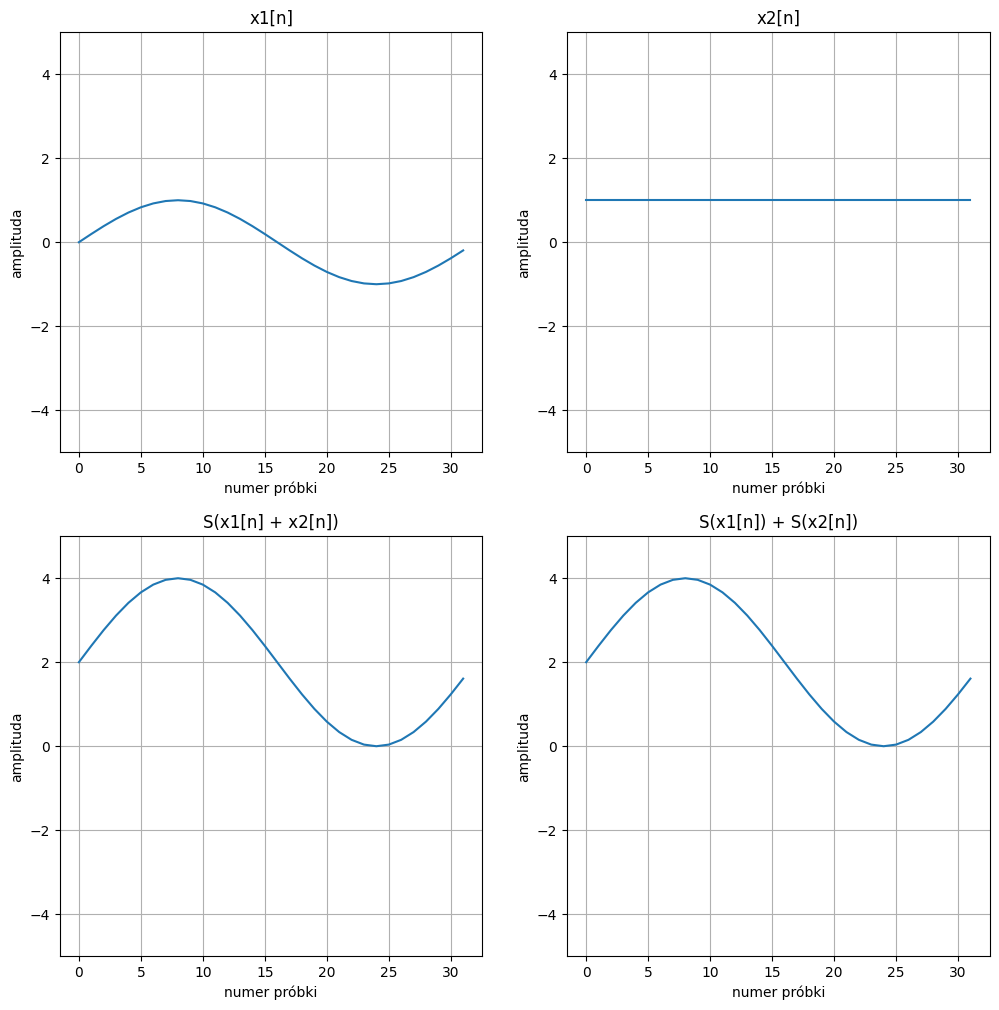

In [6]:
N = 32

x_values = np.arange(0, N)

sin_values = np.sin(2 * np.pi * x_values / N)
ones_values = np.ones(N)

_, axs = pyplot.subplots(2, 2, figsize=(12, 12))

for plot in [
    Plot(x_values, sin_values, 'x1[n]', 'numer próbki', 'amplituda', axs[0][0], y_lim=(-5, 5)),
    Plot(x_values, ones_values, 'x2[n]', 'numer próbki', 'amplituda', axs[0][1], y_lim=(-5, 5)),
    Plot(x_values, first_func(sin_values + ones_values), 'S(x1[n] + x2[n])', 'numer próbki', 'amplituda', axs[1][0],
         y_lim=(-5, 5)),
    Plot(x_values, first_func(sin_values) + first_func(ones_values), 'S(x1[n]) + S(x2[n])', 'numer próbki', 'amplituda',
         axs[1][1], y_lim=(-5, 5)),
]:
    plot.draw()

### B)

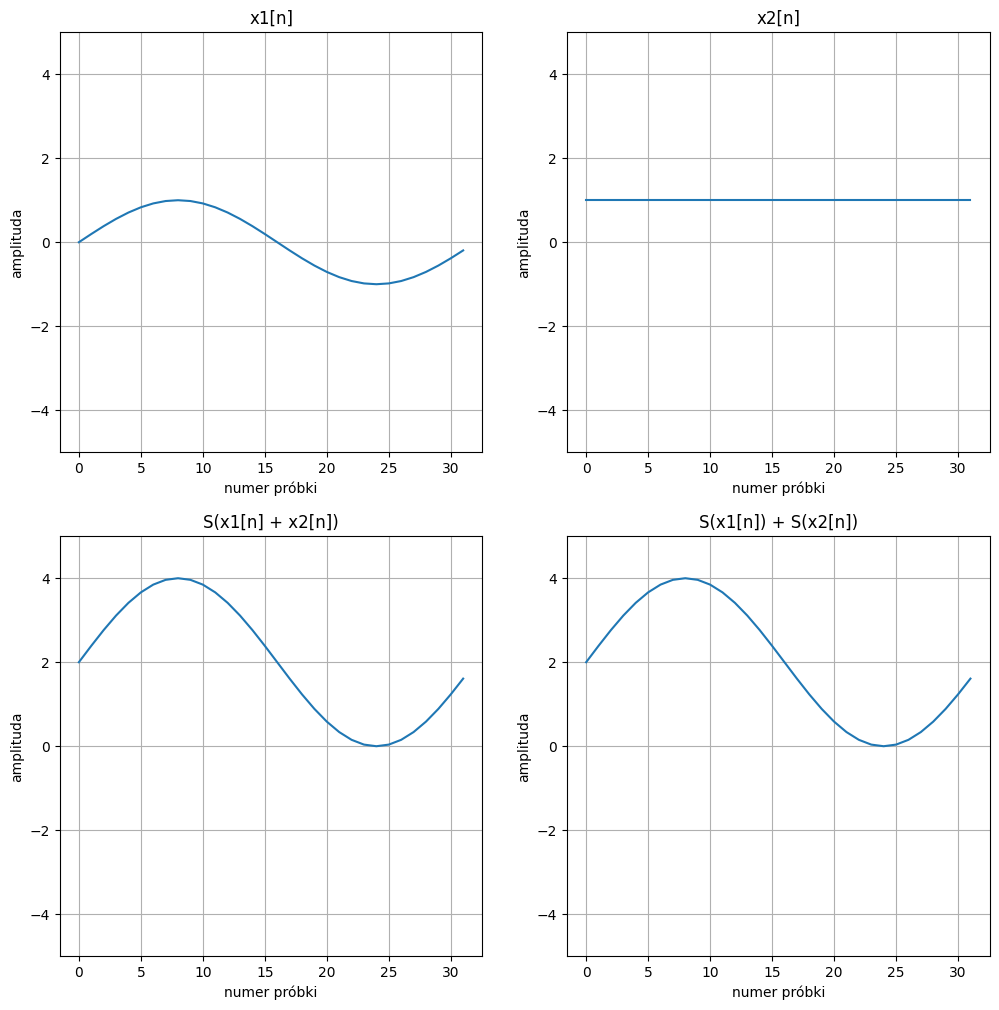

In [7]:
N = 32

x_values = np.arange(0, N)

sin_values = np.sin(2 * np.pi * x_values / N)
ones_values = np.ones(N)

_, axs = pyplot.subplots(2, 2, figsize=(12, 12))

for plot in [
    Plot(x_values, sin_values, 'x1[n]', 'numer próbki', 'amplituda', axs[0][0], y_lim=(-5, 5)),
    Plot(x_values, ones_values, 'x2[n]', 'numer próbki', 'amplituda', axs[0][1], y_lim=(-5, 5)),
    Plot(x_values, first_func(sin_values + ones_values), 'S(x1[n] + x2[n])', 'numer próbki', 'amplituda', axs[1][0],
         y_lim=(-5, 5)),
    Plot(x_values, first_func(sin_values) + first_func(ones_values), 'S(x1[n]) + S(x2[n])', 'numer próbki', 'amplituda',
         axs[1][1], y_lim=(-5, 5)),
]:
    plot.draw()


### C)

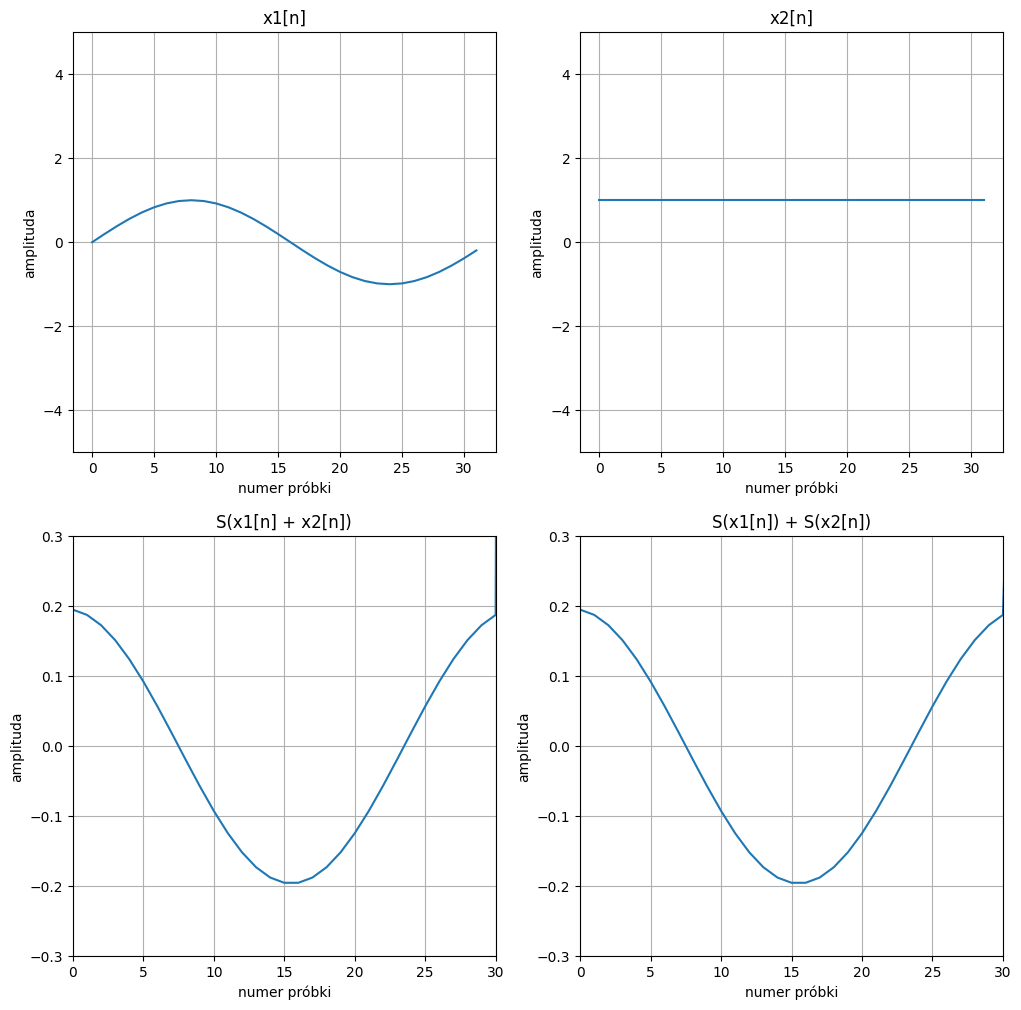

In [8]:
N = 32

x_values = np.arange(0, N)

sin_values = np.sin(2 * np.pi * x_values / N)
ones_values = np.ones(N)

_, axs = pyplot.subplots(2, 2, figsize=(12, 12))

for plot in [
    Plot(x_values, sin_values, 'x1[n]', 'numer próbki', 'amplituda', axs[0][0], y_lim=(-5, 5)),
    Plot(x_values, ones_values, 'x2[n]', 'numer próbki', 'amplituda', axs[0][1], y_lim=(-5, 5)),
    Plot(x_values, third_func(sin_values + ones_values), 'S(x1[n] + x2[n])', 'numer próbki', 'amplituda', axs[1][0],
         y_lim=(-0.3, 0.3), x_lim=(0, 30)),
    Plot(x_values, third_func(sin_values) + third_func(ones_values), 'S(x1[n]) + S(x2[n])', 'numer próbki', 'amplituda',
         axs[1][1], y_lim=(-0.3, 0.3), x_lim=(0, 30)),
]:
    plot.draw()

# Zadanie 5.2
Wygenerować sygnały x1[n] = sin(2πn/N), x2[n] = sin(4πn/N) oraz h[n] = δ[n-k], gdzie k = {0, 16, 32}, N = 64, (założyć, że 0 ≤ n < N).
Wyznaczyć splot liniowy sygnałów x1[n], x2[n] z sygnałem h[n] oraz samych ze sobą. Sporządzić wykresy, sprawdzić czy operacje splotu są
przemienne oraz liniowe (dla ustalonego sygnału h[n]).

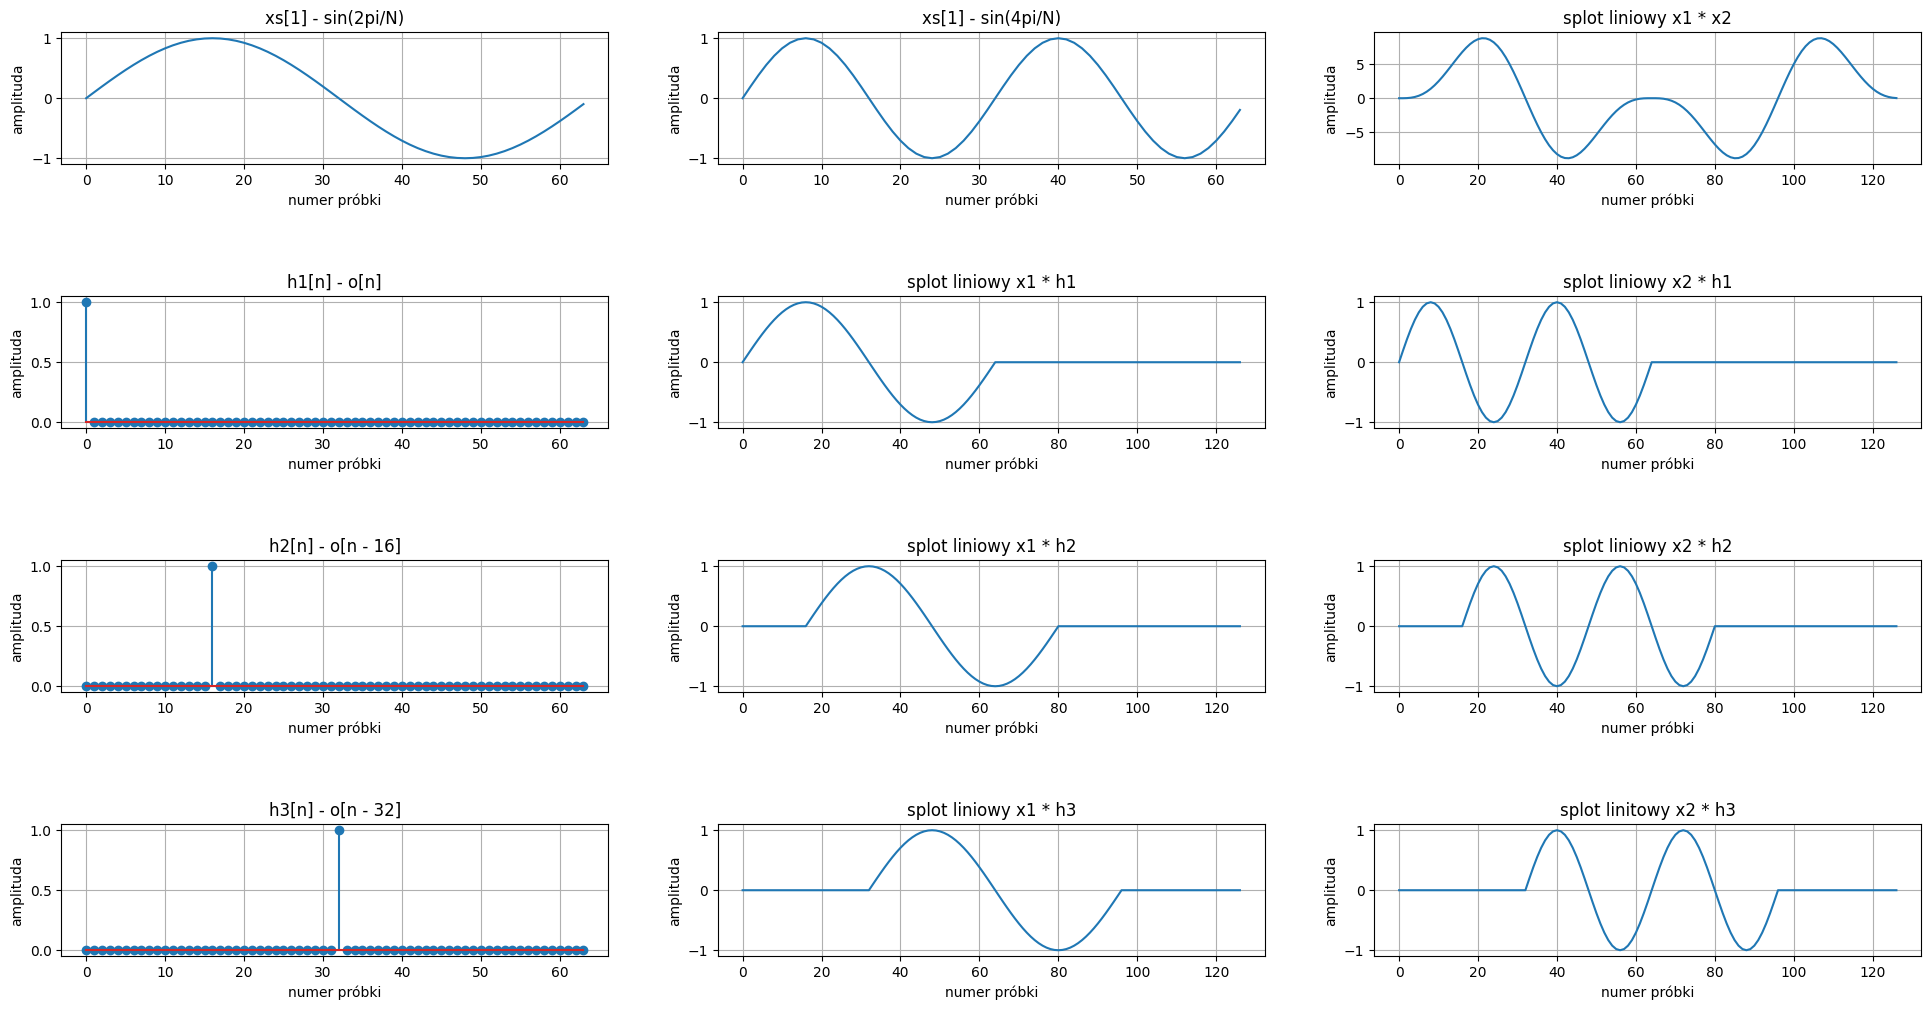

In [9]:
N = 64

x_values = np.arange(0, N)

sig_x1 = np.sin(2 * np.pi * x_values / N)
sig_x2 = np.sin(4 * np.pi * x_values / N)

zeros = np.zeros(N)
zeros[0] = 1

_, axs = pyplot.subplots(4, 3, figsize=(24, 12))

axs[0][0].plot(x_values, sig_x1)
axs[0][0].set_title('xs[1] - sin(2pi/N)')

axs[0][1].plot(x_values, sig_x2)
axs[0][1].set_title('xs[1] - sin(4pi/N)')

axs[0][2].plot(signal.convolve(sig_x1, sig_x2, method='direct'))
axs[0][2].set_title('splot liniowy x1 * x2')

axs[1][0].stem(x_values, zeros)
axs[1][0].set_title('h1[n] - o[n]')

axs[1][1].plot(signal.convolve(sig_x1, zeros, method='direct'))
axs[1][1].set_title('splot liniowy x1 * h1')

axs[1][2].plot(signal.convolve(sig_x2, zeros, method='direct'))
axs[1][2].set_title('splot liniowy x2 * h1')

zeros = np.zeros(N)
zeros[16] = 1

axs[2][0].stem(x_values, zeros)
axs[2][0].set_title('h2[n] - o[n - 16]')

axs[2][1].plot(signal.convolve(sig_x1, zeros, method='direct'))
axs[2][1].set_title('splot liniowy x1 * h2')

axs[2][2].plot(signal.convolve(sig_x2, zeros, method='direct'))
axs[2][2].set_title('splot liniowy x2 * h2')

zeros = np.zeros(N)
zeros[32] = 1

axs[3][0].stem(x_values, zeros)
axs[3][0].set_title('h3[n] - o[n - 32]')

axs[3][1].plot(signal.convolve(sig_x1, zeros, method='direct'))
axs[3][1].set_title('splot liniowy x1 * h3')

axs[3][2].plot(signal.convolve(sig_x2, zeros, method='direct'))
axs[3][2].set_title('splot linitowy x2 * h3')

for row in axs:
    for item in row:
        item.set_xlabel('numer próbki')
        item.set_ylabel('amplituda')
        item.grid()

pyplot.subplots_adjust(hspace=1)
pyplot.show()


# Zadanie 5.3
Wyznaczyć 64-punktowe DFT sygnału x1[n] z zadania 5.2 oraz sygnał h[n] = exp(-n/10), obliczyć iloczyn widm zespolonych (tj. G(k) = X1(k) * H(k) dla k = 0, 1, ..., 63) wyznaczyć IDFT iloczynu G(k). Uzyskany wynik porównać ze splotem liniowym (64-punktowym) sygnałów x1[n] i h[n].

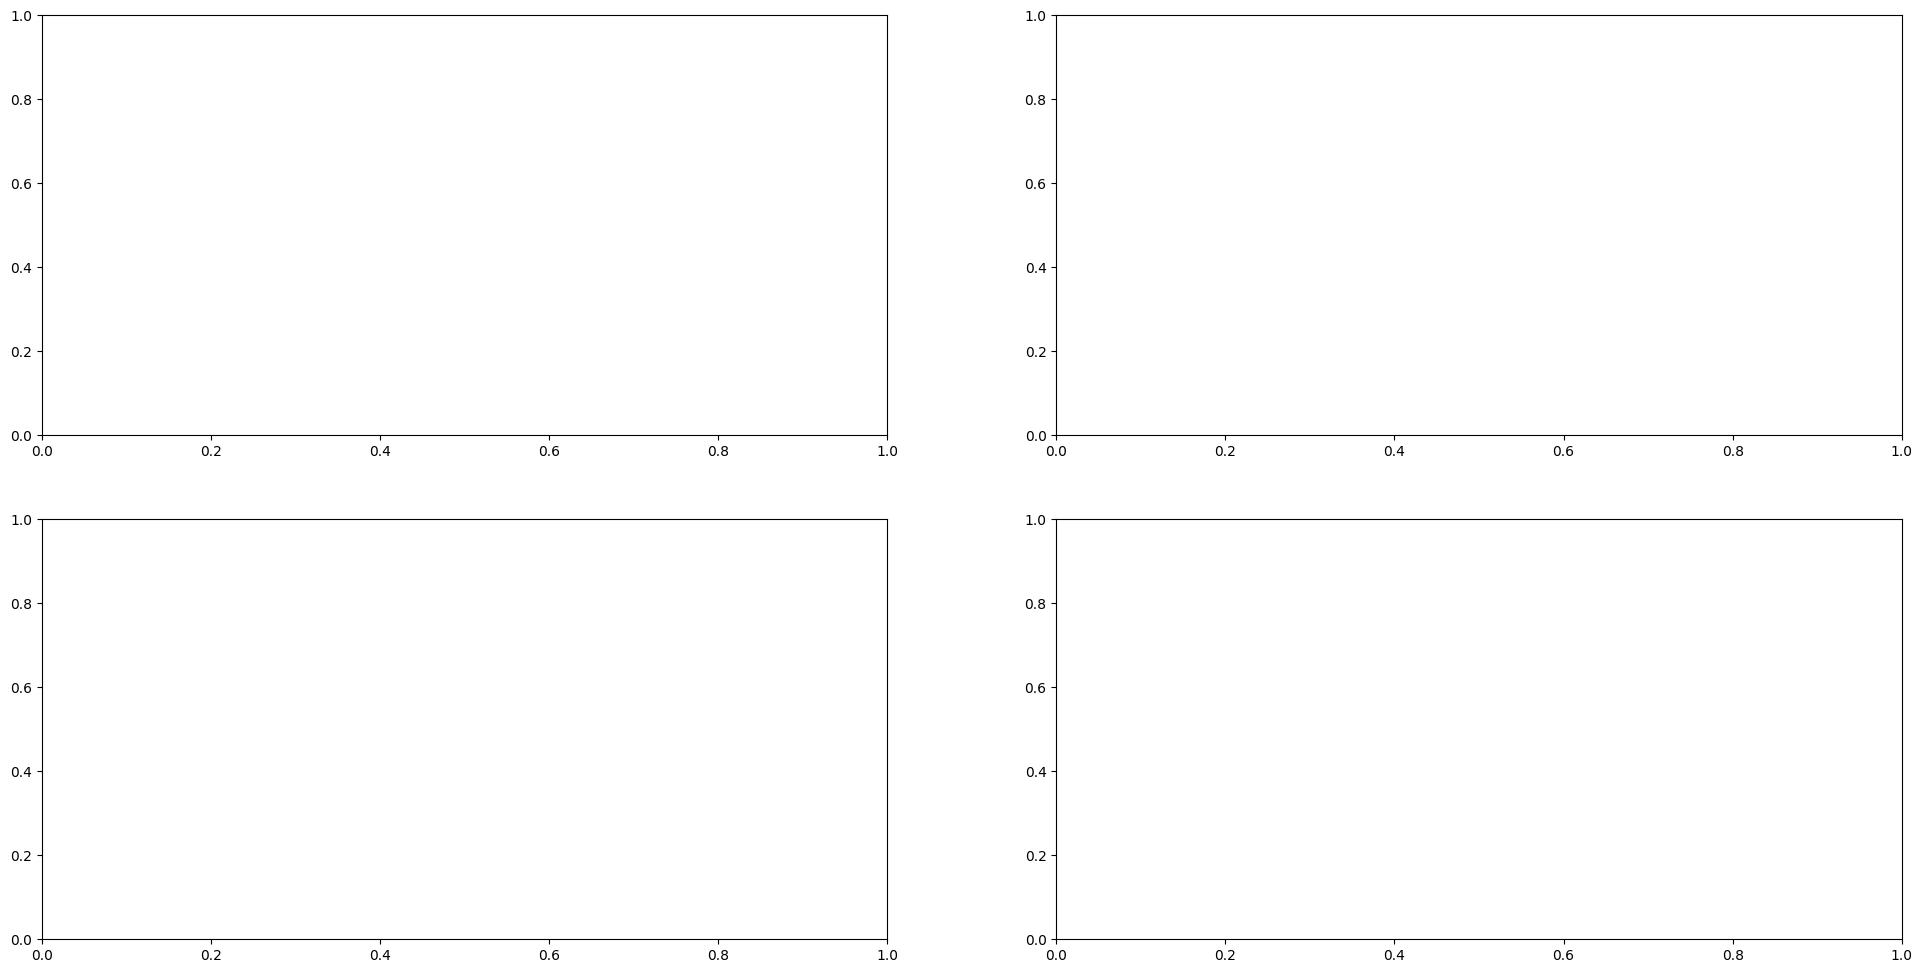

In [14]:
_, axs = pyplot.subplots(2, 2, figsize=(24, 12))

# Zadanie 5.4
Dokonać splotu nagrania dźwiękowego dokonanego w komorze bezechowej x[n] (ang. anechoic chamber) z akustyczną odpowiedzią impulsową dwóch dowolnie wybranych pomieszczeń h[n] (sala koncertowa, korytarz, itp.). Publicznie dostępne nagrania bezechowe można pobrać z serwisu soundcloud.com. Akustyczną odpowiedź impulsową należy zarejestrować samodzielnie w dowolnie wybranych pomieszczeniach lub pobrać z publicznie dostępnych repozytoriów internetowych (słowa kluczowe – ang. “concert hall impulse response”, “room impulse response”). (Podczas dokonywania splotu należy upewnić się, że częstotliwość próbkowania sygnałów x[n] oraz h[n] jest jednakowa. W razie potrzeby, ujednolicić częstotliwość próbkowania sygnałów, np. przy pomocy programu Audacity).

Jak różnią się słuchowo poszczególne sygnały (x[n], h[n] oraz ich splot)?

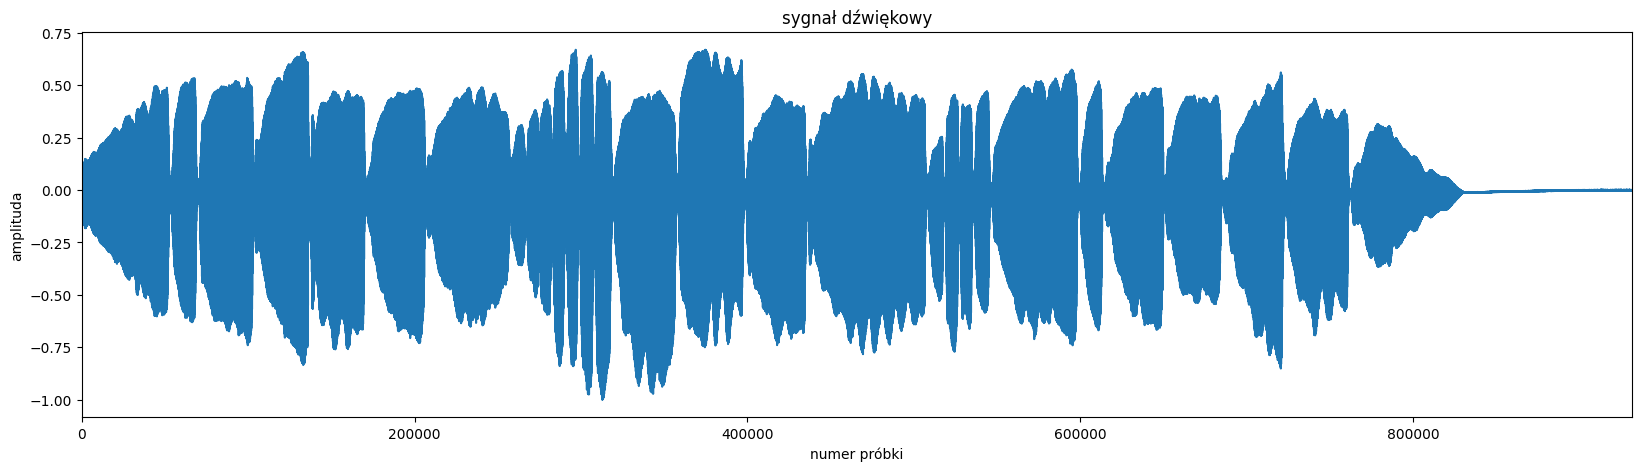

In [10]:
FS_X, X = wavfile.read('../audio/trumpet.wav')
X = X / max(abs(X))

DPI = 100

fig, ax = pyplot.subplots()
fig.set_size_inches(20, 5)
fig.set_dpi(DPI)

ax.set_xlabel('numer próbki')
ax.set_ylabel('amplituda')
ax.set_title('sygnał dźwiękowy')
ax.set_xlim(0, len(X))
ax.plot(X)

ipd.Audio(X, rate=FS_X)

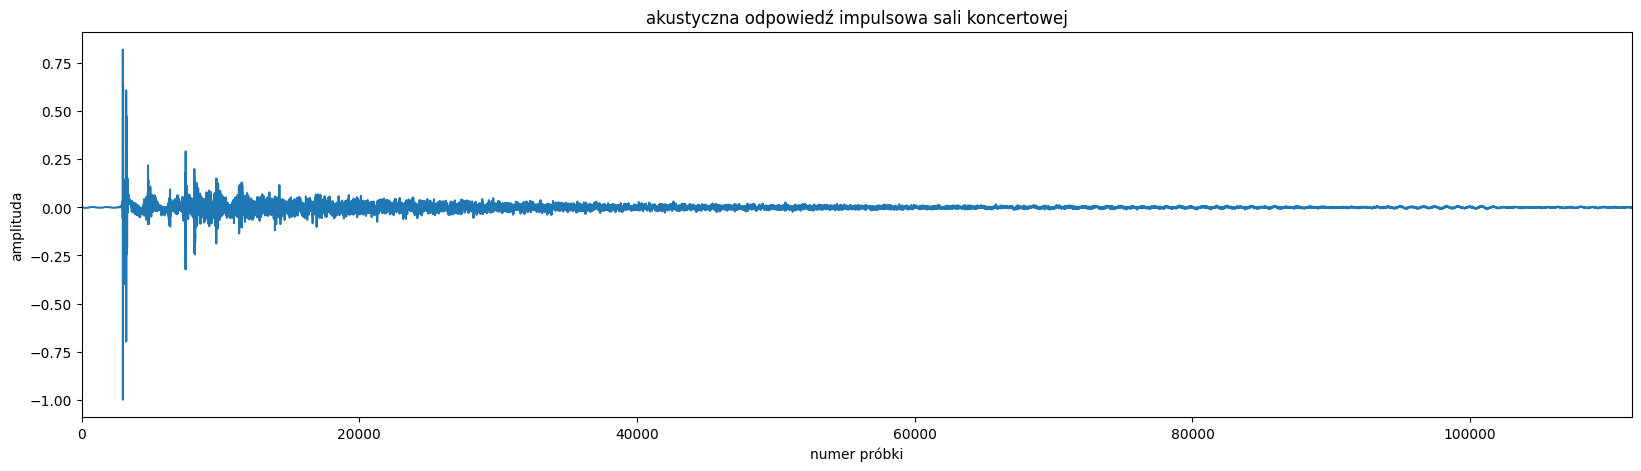

In [11]:
FS_H, H = wavfile.read('../audio/acoustic.wav')
H = H / max(abs(H))

DPI = 100

fig, ax = pyplot.subplots()
fig.set_size_inches(20, 5)
fig.set_dpi(DPI)

ax.set_xlabel('numer próbki')
ax.set_ylabel('amplituda')
ax.set_title('akustyczna odpowiedź impulsowa sali koncertowej')
ax.set_xlim(0, len(H))
ax.plot(H)

ipd.Audio(H, rate=FS_H)

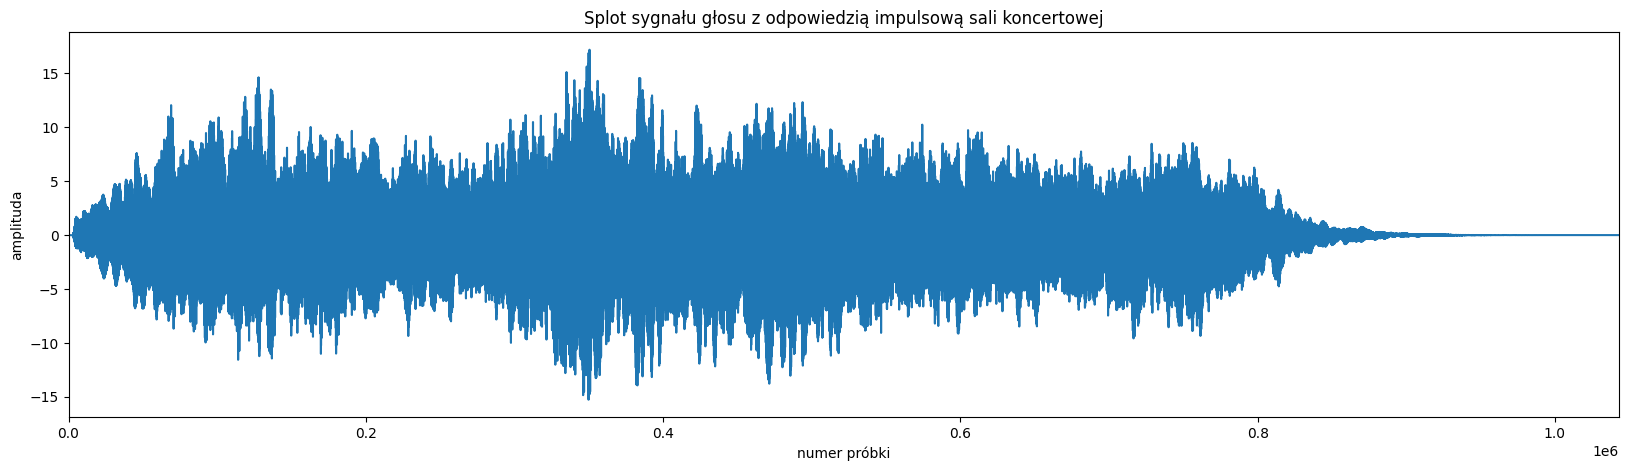

In [12]:
splot = signal.convolve(X, H)

fig, ax = pyplot.subplots(1)
fig.set_size_inches(20, 5)
fig.set_dpi(DPI)

ax.set_xlabel('numer próbki')
ax.set_ylabel('amplituda')
ax.set_title('Splot sygnału głosu z odpowiedzią impulsową sali koncertowej')
ax.set_xlim(0, len(splot))
ax.plot(splot)

ipd.Audio(splot, rate=FS_X)

# Podpisy
![Podpis](../signatures/005.jpg)
